In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist

In [2]:
(train_x, train_y) , (test_x , test_y) = mnist.load_data()

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
def draw_image(image):
    plt.figure(figsize=(2,2))
    plt.imshow(image , cmap="gray")
    plt.colorbar()
    plt.grid(False)

In [5]:
train_x , test_x = train_x /255.0 , test_x / 255.0

In [6]:
classes =  ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [37]:
#build model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(120 ,activation=keras.activations.relu),
    keras.layers.Dense(10 , activation=keras.activations.softmax)
])

In [38]:
model.compile(optimizer="sgd", loss=keras.losses.sparse_categorical_crossentropy,
              metrics=["accuracy" ,])

In [39]:
model.fit(train_x , train_y , batch_size=128 , epochs=5 , verbose=1 , validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/5
42000/42000 [==============================] - 1s 23us/step - loss: 1.3553 - acc: 0.6660 - val_loss: 0.8007 - val_acc: 0.8188
Epoch 2/5
42000/42000 [==============================] - 1s 21us/step - loss: 0.6679 - acc: 0.8396 - val_loss: 0.5476 - val_acc: 0.8628
Epoch 3/5
42000/42000 [==============================] - 1s 22us/step - loss: 0.5138 - acc: 0.8707 - val_loss: 0.4565 - val_acc: 0.8796
Epoch 4/5
42000/42000 [==============================] - 1s 21us/step - loss: 0.4459 - acc: 0.8833 - val_loss: 0.4108 - val_acc: 0.8893
Epoch 5/5
42000/42000 [==============================] - 1s 23us/step - loss: 0.4065 - acc: 0.8914 - val_loss: 0.3826 - val_acc: 0.8947


In [40]:
loss , acc = model.evaluate(test_x , test_y ,use_multiprocessing=False )

10000/10000 [==============================] - 0s 27us/step


In [41]:
predictions = model.predict(test_x)

In [43]:
#save the model
model.save("mnists_data.h5" , overwrite=True)

In [46]:
import numpy as np
preds = np.argmax(predictions , axis=1)

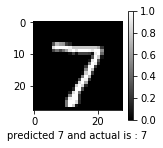

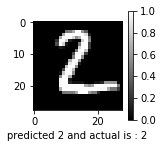

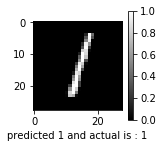

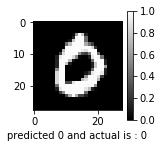

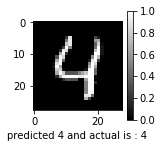

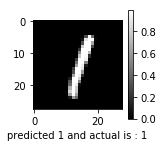

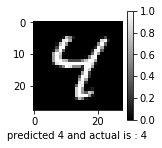

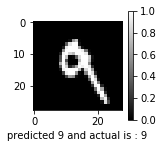

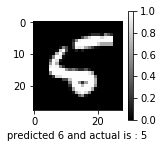

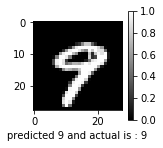

In [72]:
#print first ten predictions
for _ in range(10):
    p = preds[_]
    a = test_y[_]
    if(p == a):
        textColor  = 'r'
    else:
        textColor = 'o'
    draw_image(test_x[_])
    plt.xlabel("predicted {} and actual is : {}".format(p , a))